In [112]:
import pandas as pd
import numpy as np
from favorita.split_push import download_blob
from favorita.functions import *

In [3]:
!pwd

/Users/douiri/code/EmilienStoret/favorita


Baseline - per store


In [82]:
df=pd.read_csv("Data/df_main_V4.csv")
df

,id,date,store_nbr,family,sales,onpromotion,city,holidays,holidays_nat,is_holiday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,0,1,1,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,0,1,1,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,0,1,1,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,0,1,1,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,0,1,1,93.14
...,...,...,...,...,...,...,...,...,...,...,...
3008275,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,0,0,0,47.57
3008276,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,0,0,0,47.57
3008277,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,0,0,0,47.57
3008278,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,0,0,0,47.57


<AxesSubplot: xlabel='date'>

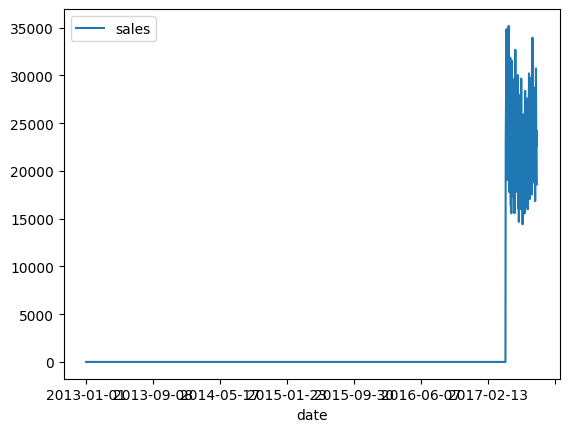

In [83]:
#focus on store number 52 with a poor sales number
df = df.query("store_nbr==52")
df = df.groupby('date').agg({'sales':'sum'},)
df.plot()

In [ ]:
#uncomment to re run the function
#store = df.store_nbr.unique()
#for s in store:
#    path = f'/Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP/store'+str(s)
#    download_blob('favorita_batch1002', f'split_data_bystore/store{s}.csv',path)

In [5]:
store = df.store_nbr.unique()
d={'store':[], 'baseline_score': []}
for s in store:
    path =  f'/Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP/store'+str(s)
    df = pd.read_csv(path)
    df = df.groupby('date').agg({'sales':'sum'},).reset_index()
    baseline_score = get_baseline_score(df)
    d['store'].append(s)
        #d['product'].append(p)
    d['baseline_score'].append(baseline_score)
df_baseline = pd.DataFrame(d)
df_baseline

09:23:34 - cmdstanpy - INFO - Chain [1] start processing
09:23:34 - cmdstanpy - INFO - Chain [1] done processing
09:23:35 - cmdstanpy - INFO - Chain [1] start processing
09:23:35 - cmdstanpy - INFO - Chain [1] done processing
09:23:36 - cmdstanpy - INFO - Chain [1] start processing
09:23:36 - cmdstanpy - INFO - Chain [1] done processing
09:23:37 - cmdstanpy - INFO - Chain [1] start processing
09:23:37 - cmdstanpy - INFO - Chain [1] done processing
09:23:38 - cmdstanpy - INFO - Chain [1] start processing
09:23:38 - cmdstanpy - INFO - Chain [1] done processing
09:23:39 - cmdstanpy - INFO - Chain [1] start processing
09:23:39 - cmdstanpy - INFO - Chain [1] done processing
09:23:40 - cmdstanpy - INFO - Chain [1] start processing
09:23:40 - cmdstanpy - INFO - Chain [1] done processing
09:23:40 - cmdstanpy - INFO - Chain [1] start processing
09:23:41 - cmdstanpy - INFO - Chain [1] done processing
09:23:41 - cmdstanpy - INFO - Chain [1] start processing
09:23:41 - cmdstanpy - INFO - Chain [1]

,store,baseline_score
0,1,0.153758
1,10,0.115569
2,11,0.131144
3,12,0.164314
4,13,0.108611
5,14,0.130154
6,15,0.093117
7,16,0.166457
8,17,0.151997
9,18,0.367780


In [6]:
df_baseline['baseline_score'].mean()

0.1409984521180735

In [68]:
df

,family,date,store_nbr,sales,holidays,holidays_nat,is_holiday,onpromotion,dcoilwtico
0,CLOTHING,2013-01-01,1,0.0,0.0,1.0,1.0,0,93.14
1,CLOTHING,2013-01-02,1,13.0,0.0,0.0,0.0,0,93.14
2,CLOTHING,2013-01-03,1,15.0,0.0,0.0,0.0,0,92.97
3,CLOTHING,2013-01-04,1,24.0,0.0,0.0,0.0,0,93.12
4,CLOTHING,2013-01-05,1,20.0,0.0,1.0,1.0,0,93.12
...,...,...,...,...,...,...,...,...,...
1679,CLOTHING,2017-08-11,1,4.0,0.0,1.0,1.0,0,48.81
1680,CLOTHING,2017-08-12,1,17.0,0.0,0.0,0.0,0,48.81
1681,CLOTHING,2017-08-13,1,10.0,0.0,0.0,0.0,0,48.81
1682,CLOTHING,2017-08-14,1,38.0,0.0,0.0,0.0,0,47.59


In [58]:
df.query("store_nbr==52")["sales"].sum()

2696169.733249

In [62]:
df.groupby('store_nbr').agg({'sales':'sum'})

,sales
store_nbr,
1,1.417755e+07
2,2.162876e+07
3,5.065960e+07
4,1.897815e+07
5,1.564707e+07
6,2.527737e+07
7,2.703080e+07
8,3.060222e+07
9,2.651172e+07


Baseline - per store and per family

In [17]:
df_cat=pd.read_csv("Data/df_main_cat.csv")
df_cat

,family,date,store_nbr,sales,holidays,holidays_nat,is_holiday,onpromotion,dcoilwtico
0,CLOTHING,2013-01-01,1,0.0,0.0,1.0,1.0,0,93.14
1,CLOTHING,2013-01-01,2,0.0,0.0,1.0,1.0,0,93.14
2,CLOTHING,2013-01-01,3,0.0,0.0,1.0,1.0,0,93.14
3,CLOTHING,2013-01-01,4,0.0,0.0,1.0,1.0,0,93.14
4,CLOTHING,2013-01-01,5,0.0,0.0,1.0,1.0,0,93.14
...,...,...,...,...,...,...,...,...,...
727483,STATIONNERY,2017-08-15,50,232.0,0.0,0.0,0.0,13,47.57
727484,STATIONNERY,2017-08-15,51,13.0,0.0,0.0,0.0,0,47.57
727485,STATIONNERY,2017-08-15,52,36.0,0.0,0.0,0.0,0,47.57
727486,STATIONNERY,2017-08-15,53,5.0,0.0,0.0,0.0,0,47.57


In [18]:
store = df_cat.store_nbr.unique()
family = df_cat.family.unique()
for s in store:
    for f in family:
        path = f'/Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store'+str(s)+'_'+str(f)
        download_blob('favorita_batch1002', f'split_data_bystore_bycat/store{s}-{f}.csv',path)
        

Downloaded storage object split_data_bystore_bycat/store1-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store1_CLOTHING.
Downloaded storage object split_data_bystore_bycat/store1-ELECTRONICS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store1_ELECTRONICS.
Downloaded storage object split_data_bystore_bycat/store1-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store1_FAMILY_CARE.
Downloaded storage object split_data_bystore_bycat/store1-FOOD_AND_BEVERAGE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store1_FOOD_AND_BEVERAGE.
Downloaded storage object split_data_bystore_bycat/store1-FRESH_FOOD.csv from bucket favorita_batch1002 to local file 

Downloaded storage object split_data_bystore_bycat/store5-OTHERS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store5_OTHERS.
Downloaded storage object split_data_bystore_bycat/store5-STATIONNERY.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store5_STATIONNERY.
Downloaded storage object split_data_bystore_bycat/store6-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store6_CLOTHING.
Downloaded storage object split_data_bystore_bycat/store6-ELECTRONICS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store6_ELECTRONICS.
Downloaded storage object split_data_bystore_bycat/store6-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/Em

Downloaded storage object split_data_bystore_bycat/store10-FRESH_FOOD.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store10_FRESH_FOOD.
Downloaded storage object split_data_bystore_bycat/store10-HOME_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store10_HOME_CARE.
Downloaded storage object split_data_bystore_bycat/store10-OTHERS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store10_OTHERS.
Downloaded storage object split_data_bystore_bycat/store10-STATIONNERY.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store10_STATIONNERY.
Downloaded storage object split_data_bystore_bycat/store11-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/c

Downloaded storage object split_data_bystore_bycat/store15-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store15_FAMILY_CARE.
Downloaded storage object split_data_bystore_bycat/store15-FOOD_AND_BEVERAGE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store15_FOOD_AND_BEVERAGE.
Downloaded storage object split_data_bystore_bycat/store15-FRESH_FOOD.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store15_FRESH_FOOD.
Downloaded storage object split_data_bystore_bycat/store15-HOME_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store15_HOME_CARE.
Downloaded storage object split_data_bystore_bycat/store15-OTHERS.csv from bucket favorita_batch1002 to local 

Downloaded storage object split_data_bystore_bycat/store20-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store20_CLOTHING.
Downloaded storage object split_data_bystore_bycat/store20-ELECTRONICS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store20_ELECTRONICS.
Downloaded storage object split_data_bystore_bycat/store20-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store20_FAMILY_CARE.
Downloaded storage object split_data_bystore_bycat/store20-FOOD_AND_BEVERAGE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store20_FOOD_AND_BEVERAGE.
Downloaded storage object split_data_bystore_bycat/store20-FRESH_FOOD.csv from bucket favorita_batch1002 to lo

Downloaded storage object split_data_bystore_bycat/store24-OTHERS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store24_OTHERS.
Downloaded storage object split_data_bystore_bycat/store24-STATIONNERY.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store24_STATIONNERY.
Downloaded storage object split_data_bystore_bycat/store25-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store25_CLOTHING.
Downloaded storage object split_data_bystore_bycat/store25-ELECTRONICS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store25_ELECTRONICS.
Downloaded storage object split_data_bystore_bycat/store25-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douir

Downloaded storage object split_data_bystore_bycat/store29-FRESH_FOOD.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store29_FRESH_FOOD.
Downloaded storage object split_data_bystore_bycat/store29-HOME_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store29_HOME_CARE.
Downloaded storage object split_data_bystore_bycat/store29-OTHERS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store29_OTHERS.
Downloaded storage object split_data_bystore_bycat/store29-STATIONNERY.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store29_STATIONNERY.
Downloaded storage object split_data_bystore_bycat/store30-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/c

Downloaded storage object split_data_bystore_bycat/store34-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store34_FAMILY_CARE.
Downloaded storage object split_data_bystore_bycat/store34-FOOD_AND_BEVERAGE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store34_FOOD_AND_BEVERAGE.
Downloaded storage object split_data_bystore_bycat/store34-FRESH_FOOD.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store34_FRESH_FOOD.
Downloaded storage object split_data_bystore_bycat/store34-HOME_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store34_HOME_CARE.
Downloaded storage object split_data_bystore_bycat/store34-OTHERS.csv from bucket favorita_batch1002 to local 

Downloaded storage object split_data_bystore_bycat/store39-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store39_CLOTHING.
Downloaded storage object split_data_bystore_bycat/store39-ELECTRONICS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store39_ELECTRONICS.
Downloaded storage object split_data_bystore_bycat/store39-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store39_FAMILY_CARE.
Downloaded storage object split_data_bystore_bycat/store39-FOOD_AND_BEVERAGE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store39_FOOD_AND_BEVERAGE.
Downloaded storage object split_data_bystore_bycat/store39-FRESH_FOOD.csv from bucket favorita_batch1002 to lo

Downloaded storage object split_data_bystore_bycat/store43-OTHERS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store43_OTHERS.
Downloaded storage object split_data_bystore_bycat/store43-STATIONNERY.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store43_STATIONNERY.
Downloaded storage object split_data_bystore_bycat/store44-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store44_CLOTHING.
Downloaded storage object split_data_bystore_bycat/store44-ELECTRONICS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store44_ELECTRONICS.
Downloaded storage object split_data_bystore_bycat/store44-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douir

Downloaded storage object split_data_bystore_bycat/store48-FRESH_FOOD.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store48_FRESH_FOOD.
Downloaded storage object split_data_bystore_bycat/store48-HOME_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store48_HOME_CARE.
Downloaded storage object split_data_bystore_bycat/store48-OTHERS.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store48_OTHERS.
Downloaded storage object split_data_bystore_bycat/store48-STATIONNERY.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store48_STATIONNERY.
Downloaded storage object split_data_bystore_bycat/store49-CLOTHING.csv from bucket favorita_batch1002 to local file /Users/douiri/c

Downloaded storage object split_data_bystore_bycat/store53-FAMILY_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store53_FAMILY_CARE.
Downloaded storage object split_data_bystore_bycat/store53-FOOD_AND_BEVERAGE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store53_FOOD_AND_BEVERAGE.
Downloaded storage object split_data_bystore_bycat/store53-FRESH_FOOD.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store53_FRESH_FOOD.
Downloaded storage object split_data_bystore_bycat/store53-HOME_CARE.csv from bucket favorita_batch1002 to local file /Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store53_HOME_CARE.
Downloaded storage object split_data_bystore_bycat/store53-OTHERS.csv from bucket favorita_batch1002 to local 

In [124]:
d={'store':[], 'family': [], 'baseline_score': []}
for s in store:
    for f in family:
        path = f'/Users/douiri/code/EmilienStoret/favorita/Data/data_pulled_from_GCP_storeandfam/store'+str(s)+'_'+str(f)
        df = pd.read_csv(path)
        df = df.groupby('date').agg({'sales':'sum'},).reset_index()
        #break
        baseline_score = get_baseline_score(df)
        d['store'].append(s)
        d['family'].append(f)
        d['baseline_score'].append(baseline_score)
    #break
df_baseline = pd.DataFrame(d)
df_baseline

10:52:20 - cmdstanpy - INFO - Chain [1] start processing
10:52:20 - cmdstanpy - INFO - Chain [1] done processing
10:52:21 - cmdstanpy - INFO - Chain [1] start processing
10:52:21 - cmdstanpy - INFO - Chain [1] done processing
10:52:22 - cmdstanpy - INFO - Chain [1] start processing
10:52:22 - cmdstanpy - INFO - Chain [1] done processing
10:52:23 - cmdstanpy - INFO - Chain [1] start processing
10:52:23 - cmdstanpy - INFO - Chain [1] done processing
10:52:24 - cmdstanpy - INFO - Chain [1] start processing
10:52:24 - cmdstanpy - INFO - Chain [1] done processing
10:52:25 - cmdstanpy - INFO - Chain [1] start processing
10:52:25 - cmdstanpy - INFO - Chain [1] done processing
10:52:25 - cmdstanpy - INFO - Chain [1] start processing
10:52:26 - cmdstanpy - INFO - Chain [1] done processing
10:52:26 - cmdstanpy - INFO - Chain [1] start processing
10:52:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by ze

10:53:23 - cmdstanpy - INFO - Chain [1] start processing
10:53:23 - cmdstanpy - INFO - Chain [1] done processing
10:53:24 - cmdstanpy - INFO - Chain [1] start processing
10:53:24 - cmdstanpy - INFO - Chain [1] done processing
10:53:25 - cmdstanpy - INFO - Chain [1] start processing
10:53:25 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:53:25 - cmdstanpy - INFO - Chain [1] start processing
10:53:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:53:26 - cmdstanpy - INFO - Chain [1] start processing
10:53:26 - cmdstanpy - INFO - Chain [1] done processing
10:53:27 - cmdstanpy - INFO - Chain [1] start processing
10:53:27 - cmdstanpy - INFO - Chain [1] done processing
10:5

10:54:08 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:54:09 - cmdstanpy - INFO - Chain [1] start processing
10:54:09 - cmdstanpy - INFO - Chain [1] done processing
10:54:10 - cmdstanpy - INFO - Chain [1] start processing
10:54:10 - cmdstanpy - INFO - Chain [1] done processing
10:54:10 - cmdstanpy - INFO - Chain [1] start processing
10:54:11 - cmdstanpy - INFO - Chain [1] done processing
10:54:11 - cmdstanpy - INFO - Chain [1] start processing
10:54:12 - cmdstanpy - INFO - Chain [1] done processing
10:54:12 - cmdstanpy - INFO - Chain [1] start processing
10:54:12 - cmdstanpy - INFO - Chain [1] done processing
10:54:13 - cmdstanpy - INFO - Chain [1] start processing
10:54:13 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encounte

10:55:00 - cmdstanpy - INFO - Chain [1] done processing
10:55:00 - cmdstanpy - INFO - Chain [1] start processing
10:55:01 - cmdstanpy - INFO - Chain [1] done processing
10:55:01 - cmdstanpy - INFO - Chain [1] start processing
10:55:01 - cmdstanpy - INFO - Chain [1] done processing
10:55:02 - cmdstanpy - INFO - Chain [1] start processing
10:55:02 - cmdstanpy - INFO - Chain [1] done processing
10:55:03 - cmdstanpy - INFO - Chain [1] start processing
10:55:03 - cmdstanpy - INFO - Chain [1] done processing
10:55:04 - cmdstanpy - INFO - Chain [1] start processing
10:55:04 - cmdstanpy - INFO - Chain [1] done processing
10:55:05 - cmdstanpy - INFO - Chain [1] start processing
10:55:05 - cmdstanpy - INFO - Chain [1] done processing
10:55:06 - cmdstanpy - INFO - Chain [1] start processing
10:55:06 - cmdstanpy - INFO - Chain [1] done processing
10:55:06 - cmdstanpy - INFO - Chain [1] start processing
10:55:07 - cmdstanpy - INFO - Chain [1] done processing
10:55:07 - cmdstanpy - INFO - Chain [1] 

10:55:49 - cmdstanpy - INFO - Chain [1] done processing
10:55:50 - cmdstanpy - INFO - Chain [1] start processing
10:55:50 - cmdstanpy - INFO - Chain [1] done processing
10:55:51 - cmdstanpy - INFO - Chain [1] start processing
10:55:51 - cmdstanpy - INFO - Chain [1] done processing
10:55:52 - cmdstanpy - INFO - Chain [1] start processing
10:55:52 - cmdstanpy - INFO - Chain [1] done processing
10:55:53 - cmdstanpy - INFO - Chain [1] start processing
10:55:53 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:55:54 - cmdstanpy - INFO - Chain [1] start processing
10:55:54 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:55:55 - cmdstanpy - INFO - Chain [1] start processing
10:5

10:56:37 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:56:38 - cmdstanpy - INFO - Chain [1] start processing
10:56:38 - cmdstanpy - INFO - Chain [1] done processing
10:56:39 - cmdstanpy - INFO - Chain [1] start processing
10:56:39 - cmdstanpy - INFO - Chain [1] done processing
10:56:40 - cmdstanpy - INFO - Chain [1] start processing
10:56:40 - cmdstanpy - INFO - Chain [1] done processing
10:56:41 - cmdstanpy - INFO - Chain [1] start processing
10:56:41 - cmdstanpy - INFO - Chain [1] done processing
10:56:42 - cmdstanpy - INFO - Chain [1] start processing
10:56:42 - cmdstanpy - INFO - Chain [1] done processing
10:56:43 - cmdstanpy - INFO - Chain [1] start processing
10:56:43 - cmdstanpy - INFO - Chain [1] done processing
10:56:44 - cmdstanpy - INFO - Chain [1] start processing
10:56:44 - cmdstanpy - INFO - Chain [1] done proce

10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing
10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:40 - cmdstanpy - INFO - Chain [1] done processing
10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:41 - cmdstanpy - INFO - Chain [1] done processing
10:57:41 - cmdstanpy - INFO - Chain [1] start processing
10:57:42 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:57:42 - cmdstanpy - INFO - Chain [1] start processing
10:57:43 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:57:43 - cmdstanpy - INFO - Chain [1] start processing
10:5

10:58:34 - cmdstanpy - INFO - Chain [1] start processing
10:58:34 - cmdstanpy - INFO - Chain [1] done processing
10:58:35 - cmdstanpy - INFO - Chain [1] start processing
10:58:35 - cmdstanpy - INFO - Chain [1] done processing
10:58:36 - cmdstanpy - INFO - Chain [1] start processing
10:58:36 - cmdstanpy - INFO - Chain [1] done processing
10:58:37 - cmdstanpy - INFO - Chain [1] start processing
10:58:37 - cmdstanpy - INFO - Chain [1] done processing
10:58:38 - cmdstanpy - INFO - Chain [1] start processing
10:58:38 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:58:38 - cmdstanpy - INFO - Chain [1] start processing
10:58:39 - cmdstanpy - INFO - Chain [1] done processing
/Users/douiri/code/EmilienStoret/favorita/favorita/functions.py:36: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_hat-y)/y))
10:5

,store,family,baseline_score
0,1,CLOTHING,0.351023
1,1,ELECTRONICS,0.316094
2,1,FAMILY_CARE,0.346092
3,1,FOOD_AND_BEVERAGE,0.158782
4,1,FRESH_FOOD,0.152095
...,...,...,...
427,54,FOOD_AND_BEVERAGE,0.163763
428,54,FRESH_FOOD,0.210369
429,54,HOME_CARE,0.176858
430,54,OTHERS,0.570234


In [125]:
df_baseline['baseline_score'].mean()

inf

In [128]:
df_baseline2 = df_baseline
df_baseline2

,store,family,baseline_score
0,1,CLOTHING,0.351023
1,1,ELECTRONICS,0.316094
2,1,FAMILY_CARE,0.346092
3,1,FOOD_AND_BEVERAGE,0.158782
4,1,FRESH_FOOD,0.152095
...,...,...,...
427,54,FOOD_AND_BEVERAGE,0.163763
428,54,FRESH_FOOD,0.210369
429,54,HOME_CARE,0.176858
430,54,OTHERS,0.570234


In [129]:
df_baseline2['baseline_score'] = df_baseline['baseline_score'].replace([np.inf], np.nan)


In [136]:
df_baseline2

,store,family,baseline_score
0,1,CLOTHING,0.351023
1,1,ELECTRONICS,0.316094
2,1,FAMILY_CARE,0.346092
3,1,FOOD_AND_BEVERAGE,0.158782
4,1,FRESH_FOOD,0.152095
...,...,...,...
427,54,FOOD_AND_BEVERAGE,0.163763
428,54,FRESH_FOOD,0.210369
429,54,HOME_CARE,0.176858
430,54,OTHERS,0.570234


In [131]:
df_baseline2['baseline_score'].mean()

0.27875021520694393

In [162]:
#MULTIPLE FAMILIES WITH NAN, 
df_baseline2.query("family=='STATIONNERY'")

,store,family,baseline_score
7,1,STATIONNERY,NaN
15,2,STATIONNERY,0.683837
23,3,STATIONNERY,0.333960
31,4,STATIONNERY,0.692508
39,5,STATIONNERY,0.442606
47,6,STATIONNERY,NaN
55,7,STATIONNERY,0.312896
63,8,STATIONNERY,0.494419
71,9,STATIONNERY,0.600433
79,10,STATIONNERY,NaN
